In [0]:
a = 3

# Customer Segmentation

<img src="https://github.com/KarnikaKapoor/Files/blob/main/Colorful%20Handwritten%20About%20Me%20Blank%20Education%20Presentation.gif?raw=true">

Neste projeto, farei uma clusterização não supervisionada de dados sobre os registros de clientes de uma base de dados de uma empresa de mercearia. A segmentação de clientes é a prática de separar clientes em grupos que refletem semelhanças entre os clientes de cada cluster. Vou dividir os clientes em segmentos para otimizar a importância de cada cliente para o negócio, modificando produtos de acordo com as necessidades e comportamentos distintos dos clientes. Isso também ajuda a empresa a atender às preocupações de diferentes tipos de clientes.


   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>   
    
* [1. IMPORTAÇÃO DAS BIBLIOTECAS](#1)
    
* [2. CARREGAMENTO DOS DADOS](#2)
    
* [3. LIMPEZA DOS DADOS](#3)
    
* [4. PRÉ-PROCESSAMENTO DOS DADOS](#4)   
    
* [5. REDUÇÃO DE DIMENSIONALIDADE](#5)
      
* [6. AGRUPAMENTO (CLUSTERIZAÇÃO)](#6)
    
* [7. AVALIAÇÃO DOS MODELOS](#7)
    
* [8. PROFILING](#8)
    
* [9. CONCLUSÃO](#9)
    
* [10. FIM](#10)


## IMPORTAÇÃO DAS BIBLIOTECAS

In [0]:
%pip install yellowbrick

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.
  Obtaining dependency information for yellowbrick from https://files.pythonhosted.org/packages/06/35/c7d44bb541c06bc41b3239b27af79ea0ecc7dbb156ee1335576f99c58b91/yellowbrick-1.5-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/282.6 kB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━ 122.9/282.6 kB 3.6 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 5.8 MB/s eta 0:00:00
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
# Importando as bibliotecas necessárias

## >> TRABALHA COM DADOS
import numpy as np               # Biblioteca para manipulação de arrays e funções matemáticas
import pandas as pd              # Biblioteca para manipulação de dados em formato de DataFrames

## >> TRABALHA COM GRÁFICOS
import matplotlib                # Biblioteca para criar visualizações gráficas
import matplotlib.pyplot as plt  # Sub-biblioteca do Matplotlib para visualizações simples
from matplotlib import colors    # Ferramentas de cores para gráficos
import seaborn as sns            # Biblioteca para visualizações estatísticas
import matplotlib.pyplot as plt, numpy as np     # Reimportando, para visualizações e manipulação de arrays
from mpl_toolkits.mplot3d import Axes3D          # Biblioteca para criar gráficos em 3D
from matplotlib.colors import ListedColormap     # Ferramenta para criar mapas de cores personalizados

## >> TRABALHA COM PRE PROCESSAMENTO
from sklearn.preprocessing import LabelEncoder  # Classe para codificação de rótulos (labels)
from sklearn.preprocessing import StandardScaler  # Classe para padronização dos dados

## >> TRABALHA COM MODELO DE ML
from sklearn.decomposition import PCA            # Classe para redução de dimensionalidade (Análise de Componentes Principais)
from yellowbrick.cluster import KElbowVisualizer  # Visualizador para encontrar o número ideal de clusters
from sklearn.cluster import KMeans               # Algoritmo K-Means para clustering
from sklearn.cluster import AgglomerativeClustering  # Algoritmo de clustering hierárquico

## >> TRABALHA COM AVALIAR O MODELO
from sklearn import metrics                      # Métricas para avaliação de modelos


## >> TRABALHA COM OUTRAS BIBLIOTECAS
import datetime                                  # Biblioteca para trabalhar com datas e horários
import warnings                                  # Biblioteca para gerenciar avisos
import sys                                       # Biblioteca para manipulação do sistema

# Ignorando avisos para evitar distrações no output
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Fixando o valor da semente para garantir a reprodutibilidade dos resultados
np.random.seed(42)


## CARREGAMENTO DOS DADOS

In [0]:
# Carregando o dataset
data = pd.read_csv("/Volumes/coderhouse_ds_58690/default/dados_manuais/base_coderhouse/marketing_campaign.csv", sep="\t")  # Lê o arquivo CSV usando '\t' como separador
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [0]:
# Lista de colunas traduzidas para o português
colunas = [
    'ID', 'Ano_Nascimento', 'Escolaridade', 'Estado_Civil', 'Renda', 'Criancas_Casa',
    'Adolescentes_Casa', 'Data_Cliente', 'Recencia', 'Gasto_Vinhos', 'Gasto_Frutas',
    'Gasto_Carnes', 'Gasto_Peixe', 'Gasto_Doces', 'Gasto_Produtos_Ouro', 
    'Num_Compras_Desconto', 'Num_Compras_Web', 'Num_Compras_Catalogo', 
    'Num_Compras_Loja', 'Num_Visitas_Web_Mes', 'Aceitou_Campanha3', 
    'Aceitou_Campanha4', 'Aceitou_Campanha5', 'Aceitou_Campanha1', 
    'Aceitou_Campanha2', 'Reclamacao', 'Custo_Contato', 'Receita', 'Resposta'
]

data.columns = colunas

print("Número de pontos de dados:", len(data))  # Exibe o número total de linhas (pontos de dados) no dataset
data.head()  # Mostra as primeiras linhas do dataset para termos uma visão geral dos dados

Número de pontos de dados: 2240


,ID,Ano_Nascimento,Escolaridade,Estado_Civil,Renda,Criancas_Casa,Adolescentes_Casa,Data_Cliente,Recencia,Gasto_Vinhos,Gasto_Frutas,Gasto_Carnes,Gasto_Peixe,Gasto_Doces,Gasto_Produtos_Ouro,Num_Compras_Desconto,Num_Compras_Web,Num_Compras_Catalogo,Num_Compras_Loja,Num_Visitas_Web_Mes,Aceitou_Campanha3,Aceitou_Campanha4,Aceitou_Campanha5,Aceitou_Campanha1,Aceitou_Campanha2,Reclamacao,Custo_Contato,Receita,Resposta
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [0]:
data

,ID,Ano_Nascimento,Escolaridade,Estado_Civil,Renda,Criancas_Casa,Adolescentes_Casa,Data_Cliente,Recencia,Gasto_Vinhos,Gasto_Frutas,Gasto_Carnes,Gasto_Peixe,Gasto_Doces,Gasto_Produtos_Ouro,Num_Compras_Desconto,Num_Compras_Web,Num_Compras_Catalogo,Num_Compras_Loja,Num_Visitas_Web_Mes,Aceitou_Campanha3,Aceitou_Campanha4,Aceitou_Campanha5,Aceitou_Campanha1,Aceitou_Campanha2,Reclamacao,Custo_Contato,Receita,Resposta
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [0]:
data.Receita.unique()

array([11])


<img src="https://github.com/KarnikaKapoor/Files/blob/main/Colorful%20Handwritten%20About%20Me%20Blank%20Education%20Presentation.png?raw=true">

Para mais informações sobre os atributos, visite [aqui](https://www.kaggle.com/imakash3011/customer-personality-analysis).

**ID**: Identificação única do cliente  
**Ano_Nascimento**: Ano de nascimento do cliente  
**Escolaridade**: Nível de escolaridade do cliente  
**Estado_Civil**: Estado civil do cliente  
**Renda**: Renda anual do cliente  
**Criancas_Casa**: Número de crianças pequenas no lar  
**Adolescentes_Casa**: Número de adolescentes no lar  
**Data_Cliente**: Data de adesão do cliente  
**Recencia**: Dias desde a última compra do cliente  
**Gasto_Vinhos**: Gasto em vinhos nos últimos dois anos  
**Gasto_Frutas**: Gasto em frutas nos últimos dois anos  
**Gasto_Carnes**: Gasto em carnes nos últimos dois anos  
**Gasto_Peixe**: Gasto em produtos de peixe nos últimos dois anos  
**Gasto_Doces**: Gasto em doces nos últimos dois anos  
**Gasto_Produtos_Ouro**: Gasto em produtos de ouro nos últimos dois anos  
**Num_Compras_Desconto**: Compras com desconto realizadas  
**Num_Compras_Web**: Compras realizadas via site  
**Num_Compras_Catalogo**: Compras realizadas via catálogo  
**Num_Compras_Loja**: Compras realizadas na loja  
**Num_Visitas_Web_Mes**: Visitas ao site no último mês  
**Aceitou_Campanha3**: Aceitação da campanha 3  
**Aceitou_Campanha4**: Aceitação da campanha 4  
**Aceitou_Campanha5**: Aceitação da campanha 5  
**Aceitou_Campanha1**: Aceitação da campanha 1  
**Aceitou_Campanha2**: Aceitação da campanha 2  
**Reclamacao**: Indicador de reclamação nos últimos dois anos  
**Custo_Contato**: Custo de contato do cliente  
**Receita**: Receita associada ao cliente  
**Resposta**: Resposta à campanha de marketing mais recente  


**Nesta seção**
* Limpeza dos Dados
* Engenharia de Atributos (Feature Engineering)

Para compreender melhor as etapas necessárias para limpar o dataset, vamos examinar as informações presentes nos dados.

## LIMPEZA DOS DADOS

**Nesta seção**
* Limpeza dos Dados
* Engenharia de Atributos (Feature Engineering)

Para compreender melhor as etapas necessárias para limpar o dataset, vamos examinar as informações presentes nos dados.

In [0]:
# Informações sobre os atributos do dataset
data.info()  # Exibe informações sobre o DataFrame, incluindo tipos de dados e contagem de valores não nulos para cada coluna


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    2240 non-null   int64  
 1   Ano_Nascimento        2240 non-null   int64  
 2   Escolaridade          2240 non-null   object 
 3   Estado_Civil          2240 non-null   object 
 4   Renda                 2216 non-null   float64
 5   Criancas_Casa         2240 non-null   int64  
 6   Adolescentes_Casa     2240 non-null   int64  
 7   Data_Cliente          2240 non-null   object 
 8   Recencia              2240 non-null   int64  
 9   Gasto_Vinhos          2240 non-null   int64  
 10  Gasto_Frutas          2240 non-null   int64  
 11  Gasto_Carnes          2240 non-null   int64  
 12  Gasto_Peixe           2240 non-null   int64  
 13  Gasto_Doces           2240 non-null   int64  
 14  Gasto_Produtos_Ouro   2240 non-null   int64  
 15  Num_Compras_Desconto 


**A partir do resultado acima, podemos concluir e observar que:**

* Existem valores ausentes na coluna de renda
* A coluna **Data_Cliente**, que indica a data em que o cliente entrou no banco de dados, não está no formato DateTime
* Existem algumas variáveis categóricas no nosso DataFrame (identificadas como dtype: object). Portanto, precisaremos codificá-las em formas numéricas mais tarde.

Primeiramente, para os valores ausentes, vou simplesmente remover as linhas que possuem valores de renda ausentes.


In [0]:
# Removendo os valores NA na coluna "Receita"
data = data.dropna(subset=["Receita"])
print("The total number of data-points after removing the rows with missing values in 'Receita' are:", len(data))

The total number of data-points after removing the rows with missing values in 'Receita' are: 2240


In [0]:
data.shape

(2240, 29)

Na próxima etapa, vou criar uma variável a partir de **"Data_Cliente"** que indica o número de dias em que um cliente está registrado no banco de dados da empresa. No entanto, para simplificar, usarei esse valor em relação ao cliente mais recente no registro.

Assim, para obter esses valores, preciso verificar as datas de registro mais recentes e mais antigas.


In [0]:
data.head()

,ID,Ano_Nascimento,Escolaridade,Estado_Civil,Renda,Criancas_Casa,Adolescentes_Casa,Data_Cliente,Recencia,Gasto_Vinhos,Gasto_Frutas,Gasto_Carnes,Gasto_Peixe,Gasto_Doces,Gasto_Produtos_Ouro,Num_Compras_Desconto,Num_Compras_Web,Num_Compras_Catalogo,Num_Compras_Loja,Num_Visitas_Web_Mes,Aceitou_Campanha3,Aceitou_Campanha4,Aceitou_Campanha5,Aceitou_Campanha1,Aceitou_Campanha2,Reclamacao,Custo_Contato,Receita,Resposta
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [0]:
# Convertendo a coluna "Data_Cliente" para o formato de data
data["Data_Cliente"] = pd.to_datetime(data["Data_Cliente"])
data.head()

,ID,Ano_Nascimento,Escolaridade,Estado_Civil,Renda,Criancas_Casa,Adolescentes_Casa,Data_Cliente,Recencia,Gasto_Vinhos,Gasto_Frutas,Gasto_Carnes,Gasto_Peixe,Gasto_Doces,Gasto_Produtos_Ouro,Num_Compras_Desconto,Num_Compras_Web,Num_Compras_Catalogo,Num_Compras_Loja,Num_Visitas_Web_Mes,Aceitou_Campanha3,Aceitou_Campanha4,Aceitou_Campanha5,Aceitou_Campanha1,Aceitou_Campanha2,Reclamacao,Custo_Contato,Receita,Resposta
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [0]:
# Criando uma lista para armazenar as datas de registro
datas = []
for i in data["Data_Cliente"]:
    i = i.date()  # Extraindo apenas a parte da data
    datas.append(i)

# Exibindo as datas de registro mais recente e mais antiga no banco de dados
print("Data de registro do cliente mais recente nos registros:", max(datas))
print("Data de registro do cliente mais antigo nos registros:", min(datas))

Data de registro do cliente mais recente nos registros: 2014-12-06
Data de registro do cliente mais antigo nos registros: 2012-01-08


In [0]:
# Convertendo a coluna "Data_Cliente" para o formato de data
data["Data_Cliente"] = pd.to_datetime(data["Data_Cliente"])

# Extraindo apenas a parte da data (sem o loop)
datas = data["Data_Cliente"].dt.date

# Exibindo as datas de registro mais recente e mais antiga no banco de dados
print("Data de registro do cliente mais recente nos registros:", max(datas))
print("Data de registro do cliente mais antigo nos registros:", min(datas))


In [0]:
datas

[datetime.date(2012, 4, 9),
 datetime.date(2014, 8, 3),
 datetime.date(2013, 8, 21),
 datetime.date(2014, 10, 2),
 datetime.date(2014, 1, 19),
 datetime.date(2013, 9, 9),
 datetime.date(2012, 11, 13),
 datetime.date(2013, 8, 5),
 datetime.date(2013, 6, 6),
 datetime.date(2014, 3, 13),
 datetime.date(2013, 11, 15),
 datetime.date(2012, 11, 13),
 datetime.date(2013, 11, 15),
 datetime.date(2013, 11, 15),
 datetime.date(2012, 10, 10),
 datetime.date(2012, 11, 24),
 datetime.date(2012, 12, 24),
 datetime.date(2012, 8, 31),
 datetime.date(2013, 3, 28),
 datetime.date(2012, 3, 11),
 datetime.date(2012, 8, 8),
 datetime.date(2013, 6, 1),
 datetime.date(2012, 12, 23),
 datetime.date(2014, 11, 1),
 datetime.date(2013, 3, 18),
 datetime.date(2013, 2, 1),
 datetime.date(2013, 5, 27),
 datetime.date(2013, 2, 20),
 datetime.date(2013, 5, 31),
 datetime.date(2013, 11, 22),
 datetime.date(2014, 5, 22),
 datetime.date(2013, 11, 5),
 datetime.date(2012, 10, 10),
 datetime.date(2012, 10, 29),
 datetime.

Criando uma variável **("Cliente_Ha")** que representa o número de dias desde que os clientes começaram a comprar na loja em relação à data do último registro.


In [0]:
# Criando a variável "Cliente_Ha" sem loop
d1 = max(datas)  # Considerando o cliente mais recente
data["Cliente_Ha"] = (d1 - data["Data_Cliente"].dt.date).dt.days

# Convertendo a coluna "Cliente_Ha" para um formato numérico
data["Cliente_Ha"] = pd.to_numeric(data["Cliente_Ha"], errors="coerce")


In [0]:
data.head()

,ID,Ano_Nascimento,Escolaridade,Estado_Civil,Renda,Criancas_Casa,Adolescentes_Casa,Data_Cliente,Recencia,Gasto_Vinhos,Gasto_Frutas,Gasto_Carnes,Gasto_Peixe,Gasto_Doces,Gasto_Produtos_Ouro,Num_Compras_Desconto,Num_Compras_Web,Num_Compras_Catalogo,Num_Compras_Loja,Num_Visitas_Web_Mes,Aceitou_Campanha3,Aceitou_Campanha4,Aceitou_Campanha5,Aceitou_Campanha1,Aceitou_Campanha2,Reclamacao,Custo_Contato,Receita,Resposta,Cliente_Ha
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,971
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,125
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,472
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,65
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,321


Agora, vamos explorar os valores únicos nas variáveis categóricas para obter uma visão clara dos dados.


In [0]:
# Exibindo o total de categorias na variável "Estado_Civil"
print("Total de categorias na variável Estado_Civil:\n", data["Estado_Civil"].value_counts(), "\n")

# Exibindo o total de categorias na variável "Escolaridade"
print("Total de categorias na variável Escolaridade:\n", data["Escolaridade"].value_counts())


Total de categorias na variável Estado_Civil:
 Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Estado_Civil, dtype: int64 

Total de categorias na variável Escolaridade:
 Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Escolaridade, dtype: int64


**Na próxima etapa, realizarei as seguintes ações para criar novas variáveis:**

* Extrair a **"Idade"** de um cliente a partir de **"Ano_Nascimento"**, que indica o ano de nascimento da pessoa.
* Criar uma nova variável **"Total_Gasto"** indicando o valor total gasto pelo cliente em diversas categorias ao longo de dois anos.
* Criar uma variável **"Mora_Com"** a partir de **"Estado_Civil"** para indicar a situação de convivência de casais.
* Criar a variável **"Filhos"** para indicar o total de crianças em uma residência, incluindo crianças pequenas e adolescentes.
* Para obter mais clareza sobre o agregado familiar, criar a variável **"Tamanho_Familia"**.
* Criar uma variável **"Tem_Filhos"** para indicar o status de parentalidade.
* Por fim, simplificar a variável **"Escolaridade"** criando três categorias principais.
* Remover algumas variáveis redundantes.


In [0]:
data.dtypes

ID                               int64
Ano_Nascimento                   int64
Escolaridade                    object
Estado_Civil                    object
Renda                          float64
Criancas_Casa                    int64
Adolescentes_Casa                int64
Data_Cliente            datetime64[ns]
Recencia                         int64
Gasto_Vinhos                     int64
Gasto_Frutas                     int64
Gasto_Carnes                     int64
Gasto_Peixe                      int64
Gasto_Doces                      int64
Gasto_Produtos_Ouro              int64
Num_Compras_Desconto             int64
Num_Compras_Web                  int64
Num_Compras_Catalogo             int64
Num_Compras_Loja                 int64
Num_Visitas_Web_Mes              int64
Aceitou_Campanha3                int64
Aceitou_Campanha4                int64
Aceitou_Campanha5                int64
Aceitou_Campanha1                int64
Aceitou_Campanha2                int64
Reclamacao               

In [0]:
# Engenharia de Atributos

ANO_ATUAL = 2021

# Calculando a idade do cliente com base no ano de nascimento
data["Idade"] = ANO_ATUAL - data["Ano_Nascimento"]

# Calculando o total de gastos em diversos itens
data["Total_Gasto"] = (data["Gasto_Vinhos"] + data["Gasto_Frutas"] + data["Gasto_Carnes"] +
                       data["Gasto_Peixe"] + data["Gasto_Doces"] + data["Gasto_Produtos_Ouro"])

# Derivando a situação de convivência a partir do estado civil
data["Mora_Com"] = data["Estado_Civil"].replace({"Married": "Companheiro", "Together": "Companheiro",
                                                 "Absurd": "Sozinho", "Widow": "Sozinho", "Alone": "Sozinho",
                                                 "YOLO": "Sozinho", "Divorced": "Sozinho", "Single": "Sozinho"})

# Indicador do total de crianças e adolescentes na residência
data["Filhos"] = data["Criancas_Casa"] + data["Adolescentes_Casa"]

# Indicador do total de membros na residência
data["Tamanho_Familia"] = data["Mora_Com"].replace({"Sozinho": 1, "Companheiro": 2}).map(int) + data["Filhos"]

# Indicador de parentalidade
data["Tem_Filhos"] = np.where(data["Filhos"] > 0, 1, 0)

# Segmentando os níveis de escolaridade em três grupos principais
data["Escolaridade"] = data["Escolaridade"].replace({"Basic": "Graduacao_Incompleta", 
                                                     "2n Cycle": "Graduacao_Incompleta", 
                                                     "Graduation": "Graduado", 
                                                     "Master": "Pos_Graduado", 
                                                     "PhD": "Pos_Graduado"})

# Renomeando colunas para maior clareza
data = data.rename(columns={"Gasto_Vinhos": "Vinhos", "Gasto_Frutas": "Frutas", 
                            "Gasto_Carnes": "Carnes", "Gasto_Peixe": "Peixes", 
                            "Gasto_Doces": "Doces", "Gasto_Produtos_Ouro": "Ouro"})

# Removendo algumas colunas redundantes
colunas_para_remover = ["Estado_Civil", "Data_Cliente", "Custo_Contato", "Receita", "Ano_Nascimento", "ID"]
data = data.drop(colunas_para_remover, axis=1)


Agora que temos algumas novas variáveis, vamos dar uma olhada nas estatísticas dos dados.


In [0]:
# Exibindo as estatísticas descritivas do DataFrame
data.describe()  # Mostra informações como média, desvio padrão, valores mínimo e máximo de cada coluna numérica


,ID,Ano_Nascimento,Renda,Criancas_Casa,Adolescentes_Casa,Recencia,Gasto_Vinhos,Gasto_Frutas,Gasto_Carnes,Gasto_Peixe,Gasto_Doces,Gasto_Produtos_Ouro,Num_Compras_Desconto,Num_Compras_Web,Num_Compras_Catalogo,Num_Compras_Loja,Num_Visitas_Web_Mes,Aceitou_Campanha3,Aceitou_Campanha4,Aceitou_Campanha5,Aceitou_Campanha1,Aceitou_Campanha2,Reclamacao,Custo_Contato,Receita,Resposta,Cliente_Ha
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,512.043304
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,232.229893
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,340.750000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,513.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,685.250000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,1063.000000


As estatísticas acima mostram algumas discrepâncias na média e no valor máximo da **Renda** e **Idade**.

Observe que a idade máxima é de 128 anos. Como calculei a idade com base no ano atual (2021), é importante lembrar que os dados são antigos.

Preciso ter uma visão mais ampla dos dados. Vou plotar algumas das variáveis selecionadas.


Gráfico Relativo de Algumas Variáveis Selecionadas: Um Subconjunto de Dados


<Figure size 800x550 with 0 Axes>

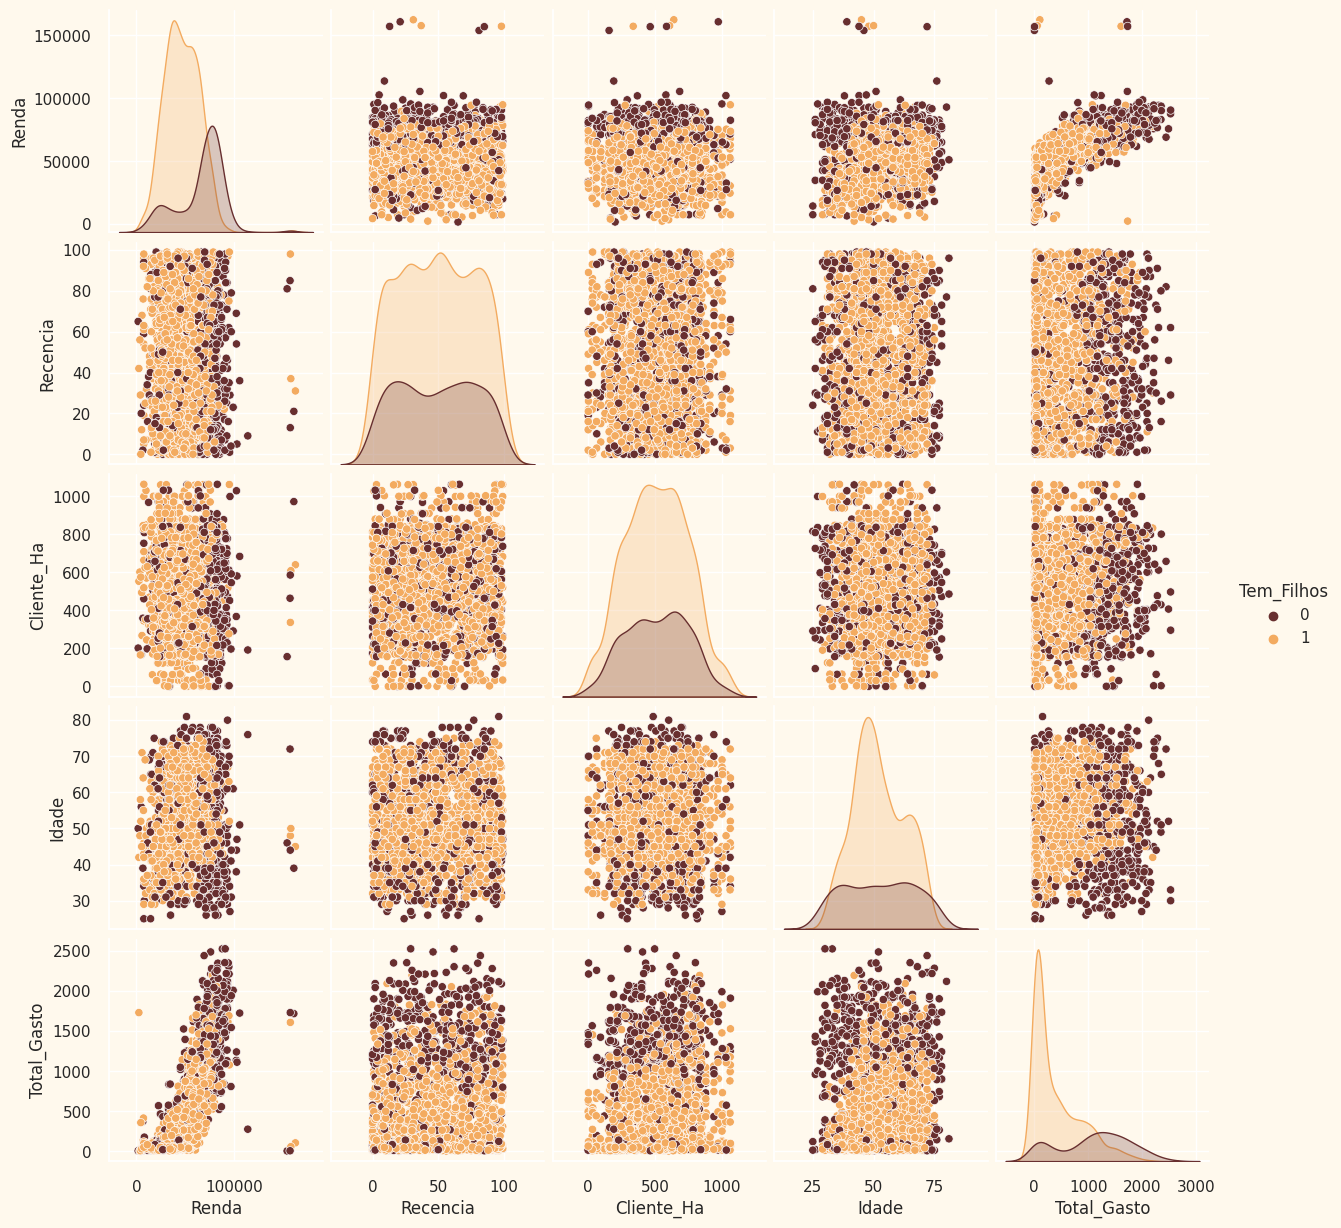

In [0]:
# Para plotar algumas variáveis selecionadas

# Configurando preferências de cores
sns.set(rc={"axes.facecolor": "#FFF9ED", "figure.facecolor": "#FFF9ED"})  # Definindo a cor de fundo dos gráficos
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

# Selecionando variáveis para plotar
Para_Plotar = ["Renda", "Recencia", "Cliente_Ha", "Idade", "Total_Gasto", "Tem_Filhos"]
print("Gráfico Relativo de Algumas Variáveis Selecionadas: Um Subconjunto de Dados")

# Criando o gráfico
plt.figure()
sns.pairplot(data[Para_Plotar], hue="Tem_Filhos", palette=(["#682F2F", "#F3AB60"]))  # Adicionando cor com base na variável "Tem_Filhos"

# Exibindo o gráfico
plt.show()


Claramente, há alguns outliers nas variáveis **Renda** e **Idade**. 
Vou remover os outliers dos dados.


In [0]:
# Removendo os outliers ao definir um limite para Idade e Renda
data = data[(data["Idade"] < 90)]  # Mantém apenas os registros com Idade menor que 90 anos
data = data[(data["Renda"] < 600000)]  # Mantém apenas os registros com Renda menor que 600.000

# Exibindo o total de pontos de dados após a remoção dos outliers
print("O número total de pontos de dados após a remoção dos outliers é:", len(data))


O número total de pontos de dados após a remoção dos outliers é: 2212


A seguir, vamos examinar a correlação entre as variáveis.
(Neste ponto, excluindo as variáveis categóricas)


In [0]:
# Matriz de correlação
corrmat = data.corr()  # Calcula a matriz de correlação entre as variáveis numéricas
plt.figure(figsize=(20, 20))  # Define o tamanho do gráfico

# Cria o mapa de calor para visualizar as correlações
sns.heatmap(corrmat, annot=True, cmap=cmap, center=0)


## PRÉ-PROCESSAMENTO DOS DADOS

Os dados estão bastante limpos, e as novas variáveis foram incluídas. Vou prosseguir para a próxima etapa, que é o pré-processamento dos dados.

Nesta seção, farei o pré-processamento dos dados para realizar operações de clusterização.

**Os seguintes passos serão aplicados para pré-processar os dados:**

* Codificação das variáveis categóricas utilizando *label encoding*
* Escalonamento das variáveis usando o *standard scaler*
* Criação de um subconjunto de dados para a redução de dimensionalidade


In [0]:
# Obter a lista de variáveis categóricas
s = (data.dtypes == 'object')  # Verifica quais colunas possuem o tipo de dados "object"
colunas_categoricas = list(s[s].index)  # Cria uma lista com os nomes das colunas categóricas

# Exibe as variáveis categóricas no dataset
print("Variáveis categóricas no dataset:", colunas_categoricas)


In [0]:
# Aplicando o Label Encoding nas variáveis categóricas
LE = LabelEncoder()  # Inicializa o codificador
for i in colunas_categoricas:
    data[i] = data[[i]].apply(LE.fit_transform)  # Codifica cada variável categórica

print("Todas as variáveis agora são numéricas")


In [0]:
# Criando uma cópia do DataFrame original
ds = data.copy()

# Criando um subconjunto do DataFrame, removendo as variáveis relacionadas a campanhas e promoções aceitas
colunas_para_remover = ['Aceitou_Campanha3', 'Aceitou_Campanha4', 'Aceitou_Campanha5', 
                        'Aceitou_Campanha1', 'Aceitou_Campanha2', 'Reclamacao', 'Resposta']
ds = ds.drop(colunas_para_remover, axis=1)

# Escalonamento das variáveis
scaler = StandardScaler()  # Inicializa o escalador padrão
scaler.fit(ds)  # Ajusta o escalador aos dados
scaled_ds = pd.DataFrame(scaler.transform(ds), columns=ds.columns)  # Transforma e cria um DataFrame escalonado

print("Todas as variáveis foram escalonadas")


In [0]:
# Dados escalonados a serem usados para redução de dimensionalidade
print("DataFrame a ser usado para modelagem adicional:")
scaled_ds.head()  # Mostra as primeiras linhas do DataFrame escalonado


## REDUÇÃO DE DIMENSIONALIDADE

Neste problema, existem muitos fatores que serão considerados na classificação final. Esses fatores são basicamente atributos ou variáveis. Quanto maior o número de variáveis, mais difícil é trabalhar com o conjunto de dados. Muitos desses atributos estão correlacionados e, portanto, são redundantes. Por isso, vou realizar uma redução de dimensionalidade nas variáveis selecionadas antes de aplicá-las em um classificador.  
*A redução de dimensionalidade é o processo de reduzir o número de variáveis aleatórias consideradas, obtendo um conjunto de variáveis principais.*

**Análise de Componentes Principais (PCA)** é uma técnica para reduzir a dimensionalidade de tais conjuntos de dados, aumentando a interpretabilidade ao mesmo tempo que minimiza a perda de informações.

**Etapas desta seção:**
* Redução de dimensionalidade com PCA
* Plotagem do DataFrame reduzido

**Redução de dimensionalidade com PCA**

Para este projeto, vou reduzir as dimensões para 3.


In [0]:
# Iniciando o PCA para reduzir as dimensões (ou variáveis) para 3
pca = PCA(n_components=3)  # Define o PCA para reduzir para 3 componentes principais
pca.fit(scaled_ds)  # Ajusta o PCA aos dados escalonados

# Transformando o DataFrame escalonado e criando um novo DataFrame com 3 colunas
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=["coluna1", "coluna2", "coluna3"])

# Exibe a descrição estatística transposta das colunas resultantes do PCA
PCA_ds.describe().T


In [0]:
# Projeção 3D dos dados na dimensão reduzida
x = PCA_ds["coluna1"]
y = PCA_ds["coluna2"]
z = PCA_ds["coluna3"]

# Para plotar
fig = plt.figure(figsize=(10, 8))  # Define o tamanho da figura
ax = fig.add_subplot(111, projection="3d")  # Cria um gráfico 3D
ax.scatter(x, y, z, c="maroon", marker="o")  # Plota os pontos na projeção 3D com a cor e o marcador especificados
ax.set_title("Projeção 3D dos Dados na Dimensão Reduzida")  # Define o título do gráfico
plt.show()  # Exibe o gráfico


## AGRUPAMENTO (CLUSTERIZAÇÃO)

Agora que reduzi os atributos para três dimensões, vou realizar a clusterização utilizando o método de *Agglomerative Clustering*. *Agglomerative Clustering* é um método de clusterização hierárquica, que envolve a fusão de exemplos até que o número desejado de clusters seja alcançado.

**Etapas envolvidas na Clusterização**
* Método do Cotovelo (*Elbow Method*) para determinar o número ideal de clusters a serem formados
* Clusterização utilizando *Agglomerative Clustering*
* Exame dos clusters formados através de um gráfico de dispersão


In [0]:
# Exame rápido do método do cotovelo para encontrar o número de clusters a serem formados
print('Método do Cotovelo para determinar o número ideal de clusters:')

Elbow_M = KElbowVisualizer(KMeans(), k=10)  # Inicializa o visualizador do Método do Cotovelo com até 10 clusters
Elbow_M.fit(PCA_ds)  # Ajusta o visualizador aos dados reduzidos pelo PCA
Elbow_M.show()  # Exibe o gráfico do Método do Cotovelo


A célula acima indica que quatro será o número ideal de clusters para este conjunto de dados.
A seguir, vamos ajustar o modelo de *Agglomerative Clustering* para obter os clusters finais.


In [0]:
# Inicializando o modelo de Agglomerative Clustering
AC = AgglomerativeClustering(n_clusters=4)

# Ajusta o modelo e prevê os clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC  # Adiciona a coluna "Clusters" ao DataFrame reduzido

# Adicionando a variável "Clusters" ao DataFrame original
data["Clusters"] = yhat_AC


Para examinar os clusters formados, vamos observar a distribuição 3D dos clusters.


In [0]:
# Plotando os clusters
fig = plt.figure(figsize=(10, 8))  # Define o tamanho da figura
ax = plt.subplot(111, projection='3d', label="bla")  # Cria um gráfico 3D
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap=cmap)  # Plota os pontos coloridos pelos clusters

ax.set_title("Gráfico dos Clusters")  # Define o título do gráfico
plt.show()  # Exibe o gráfico


## AVALIAÇÃO DOS MODELOS

Como esta é uma clusterização não supervisionada, não temos uma variável etiquetada para avaliar ou pontuar nosso modelo. O objetivo desta seção é estudar os padrões nos clusters formados e determinar a natureza dos padrões desses clusters.

Para isso, vamos observar os dados à luz dos clusters por meio de uma análise exploratória dos dados e tirar conclusões.

**Primeiramente, vamos observar a distribuição dos grupos de clusterização.**


In [0]:
# Plotando a distribuição dos clusters
paleta = ["#682F2F", "#B9C0C9", "#9F8A78", "#F3AB60"]
pl = sns.countplot(x=data["Clusters"], palette=paleta)  # Cria o gráfico de contagem para os clusters
pl.set_title("Distribuição dos Clusters")  # Define o título do gráfico
plt.show()  # Exibe o gráfico


Os clusters parecem estar distribuídos de forma equilibrada.


In [0]:
# Plotando o perfil dos clusters com base na Renda e no Gasto Total
pl = sns.scatterplot(data=data, x=data["Total_Gasto"], y=data["Renda"], hue=data["Clusters"], palette=paleta)
pl.set_title("Perfil dos Clusters com Base na Renda e nos Gastos")
plt.legend()  # Adiciona a legenda para identificar os clusters
plt.show()  # Exibe o gráfico


**O gráfico de Renda vs. Gastos mostra o padrão dos clusters:**
* grupo 0: altos gastos & renda média
* grupo 1: altos gastos & alta renda
* grupo 2: baixos gastos & baixa renda
* grupo 3: altos gastos & baixa renda  

Em seguida, vou examinar a distribuição detalhada dos clusters em relação aos diversos produtos nos dados, a saber: Vinhos, Frutas, Carnes, Peixes, Doces e Ouro.


In [0]:
# Criando uma visualização detalhada dos gastos por cluster
plt.figure()  # Cria uma nova figura
pl = sns.swarmplot(x=data["Clusters"], y=data["Total_Gasto"], color="#CBEDDD", alpha=0.5)  # Cria o gráfico de dispersão para os clusters
pl = sns.boxenplot(x=data["Clusters"], y=data["Total_Gasto"], palette=paleta)  # Cria o gráfico de caixa (boxen plot) sobreposto
plt.show()  # Exibe o gráfico



A partir do gráfico acima, é possível ver claramente que o cluster 1 é o nosso maior grupo de clientes, seguido de perto pelo cluster 0.
Podemos explorar em que cada cluster está gastando para definir estratégias de marketing direcionadas.


Vamos agora explorar o desempenho das nossas campanhas no passado.


In [0]:
# Criando uma variável para obter a soma das promoções aceitas
data["Total_Promocoes"] = (data["Aceitou_Campanha1"] + data["Aceitou_Campanha2"] +
                           data["Aceitou_Campanha3"] + data["Aceitou_Campanha4"] +
                           data["Aceitou_Campanha5"])

# Plotando a contagem de campanhas aceitas no total
plt.figure()  # Cria uma nova figura
pl = sns.countplot(x=data["Total_Promocoes"], hue=data["Clusters"], palette=paleta)  # Cria um gráfico de contagem com clusters coloridos
pl.set_title("Contagem de Promoções Aceitas")  # Define o título do gráfico
pl.set_xlabel("Número Total de Promoções Aceitas")  # Define o rótulo do eixo x
plt.show()  # Exibe o gráfico


A resposta às campanhas não tem sido muito expressiva até o momento. Houve poucos participantes no geral, e ninguém participou de todas as 5 campanhas. Talvez campanhas mais bem direcionadas e planejadas sejam necessárias para impulsionar as vendas.



In [0]:
# Plotando o número de compras com desconto
plt.figure()  # Cria uma nova figura
pl = sns.boxenplot(y=data["Num_Compras_Desconto"], x=data["Clusters"], palette=paleta)  # Cria o gráfico de caixa para o número de compras com desconto por cluster
pl.set_title("Número de Compras com Desconto")  # Define o título do gráfico
plt.show()  # Exibe o gráfico


Diferentemente das campanhas, as ofertas promocionais tiveram um bom desempenho, com o melhor resultado nos clusters 0 e 3.
No entanto, nossos principais clientes, do cluster 1, não estão muito interessados nas ofertas.
Nada parece atrair o cluster 2 de forma significativa.



In [0]:
# Para obter mais detalhes sobre o estilo de compra
Locais = ["Num_Compras_Web", "Num_Compras_Catalogo", "Num_Compras_Loja", "Num_Visitas_Web_Mes"]

# Criando gráficos de dispersão para cada local de compra em relação ao gasto total
for i in Locais:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Total_Gasto"], hue=data["Clusters"], palette=paleta)
    plt.show()


## PROFILING

Agora que formamos os clusters e analisamos seus hábitos de compra, vamos ver quem está presente em cada cluster. Para isso, vamos fazer a perfilagem dos clusters formados e chegar a uma conclusão sobre quem é nosso cliente de destaque e quem precisa de mais atenção da equipe de marketing da loja.

Para decidir isso, irei plotar algumas variáveis que indicam os traços pessoais dos clientes, com base no cluster ao qual pertencem. 
Com base nos resultados, chegarei às conclusões.


In [0]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["Clusters"], kind="kde", palette=pal)
    plt.show()


**Pontos a serem observados:**

As seguintes informações podem ser deduzidas sobre os clientes em diferentes clusters.


<img src="https://github.com/KarnikaKapoor/Files/blob/main/Colorful%20Handwritten%20About%20Me%20Blank%20Education%20Presentation%20(3).png?raw=true">
  

## CONCLUSÃO

Neste projeto, realizei uma clusterização não supervisionada.
Utilizei redução de dimensionalidade seguida de *Agglomerative Clustering*.
Cheguei a 4 clusters e, em seguida, os utilizei para perfilar os clientes de acordo com suas estruturas familiares e padrões de renda/gastos.
Esses insights podem ser utilizados para planejar melhores estratégias de marketing.

**<span style="color:#682F2F;">Se você gostou deste Notebook, por favor, deixe seu voto positivo.</span>**

**<span style="color:#682F2F;">Se tiver alguma dúvida, sinta-se à vontade para comentar!</span>**

**<span style="color:#682F2F;">Melhores Desejos!</span>**


## FIM